<a href="https://colab.research.google.com/github/inachenyx/GZPeite/blob/main/boolean_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
my_dict = {"key1": True, 1: False, "True": True}
print(my_dict)
print(my_dict[1]) # False
print(my_dict[True]) # False
print(my_dict["True"]) # True

{'key1': True, 1: False, 'True': True}
False
False
True


In [ ]:
import pandas as pd
data = [True, False, True]
print(data)
print(type(data))
mask = pd.DataFrame(data)
print(mask)
print(type(data))
print(mask.values)

print(mask[data])
print(mask[data].values)
print(mask[data].index.values)

[True, False, True]
<class 'list'>
       0
0   True
1  False
2   True
[[ True]
 [False]
 [ True]]
      0
0  True
2  True
[[ True]
 [ True]]
[0 2]


In [ ]:
data = [['0', True], ['1', False], ['2', True]]
print(data)
mask = pd.DataFrame(data)
print(mask)
print(mask.values)

print(mask[mask])
print(mask[mask].values)
print(mask[mask].index.values)

[['0', True], ['1', False], ['2', True]]
   0      1
0  0   True
1  1  False
2  2   True
[['0' True]
 ['1' False]
 ['2' True]]


ValueError: Boolean array expected for the condition, not object

[0.4913 0.6444 0.993  1.4187 1.9839]


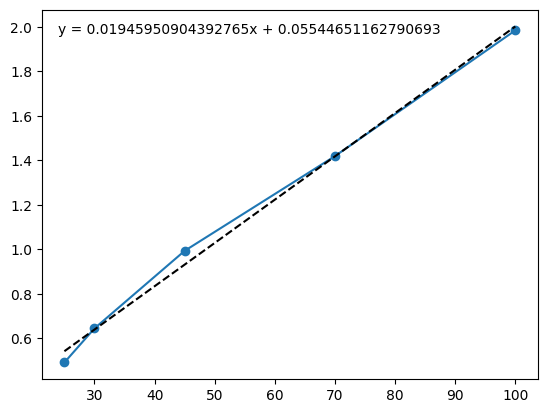

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# weights of empty microcentrifuge tubes
w0 = np.array([0.9282, 0.939, 0.9919, 0.9598, 0.9460])
# weights after 30s of fluid flow
w = np.array([1.4195, 1.5834, 1.9849, 2.3785, 2.9299])
dw = np.subtract(w,w0)
    # [x - y for x, y in zip(w, w0)]
print(dw)

rpm = np.array([25, 30, 45, 70, 100]) # RPMs of respective fluid speed
plt.plot(rpm, dw, marker='o')

slope, intercept = np.polyfit(rpm, dw, 1) # linear fit
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
plt.plot(rpm, poly1d_fn(rpm), '--k')

In [ ]:
new_w = [0.01667, 1.6667, 8.333, 16.6667, 25]
new_rpm = [(y - intercept) / slope for y in new_w]
print(new_rpm)

[-1.9926767700240189, 82.80031550307203, 425.37319259630084, 853.6316846881418, 1281.8696212768048]


[ 13.248  23.568  37.656  50.544  58.956  77.328  88.632  98.796 111.864
 124.728 149.808 170.244 195.    208.44  238.068]


(0.0, 255.0)

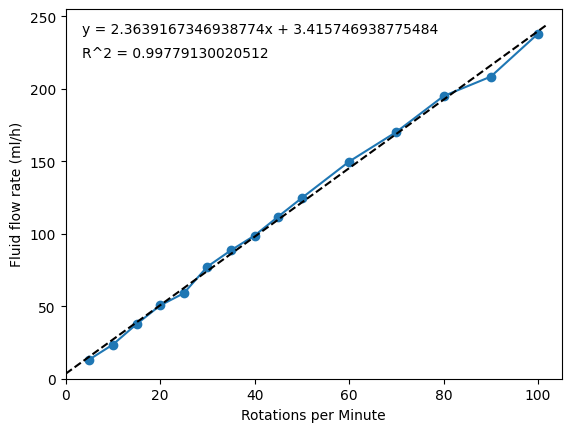

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
w0 = np.array([0.9381, 0.9557, 0.9425, 0.9533, 0.9282, 0.939, 0.9375, 0.9425,
               0.9459, 0.9421, 0.9461, 0.9598, 0.9392, 0.9318, 0.9460])
w = np.array([1.0485, 1.1521, 1.2563, 1.3745, 1.4195, 1.5834, 1.6761, 1.7658,
              1.8781, 1.9815, 2.1945, 2.3785, 2.5642, 2.6688, 2.9299])
dw = np.subtract(w,w0) # (ml/30s)
vpm = dw * 2 # (ml/min)
vph = vpm * 60 # (ml/hour)
print(vph)

rpm = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, marker='o')

slope, intercept = np.polyfit(rpm, vph, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per Minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.xlim(0, 105)
plt.ylim(0,255)

In [ ]:
new_v = [0.1, 10, 50, 100, 200, 500, 1000, 1500] # test fluid speeds
new_rpm = [(y - intercept) / slope for y in new_v]
print(np.array(new_rpm).tolist()) # test rpm settings

[-1.4026496323293158, 2.785315135931454, 19.70638490668204, 40.85772212012027, 83.16039654699674, 210.06841982762612, 421.5817919620084, 633.0951640963907]


In [ ]:
v_min = slope * 5 + intercept # min RPM is 5
print(f'Minimum fluid speed available is {v_min} ml/h')
t_run = 0.1/v_min * 60 * 60
print(f'Run at 5 rpm for {t_run} sec, then stop for {3600 - t_run} sec.')

Minimum fluid speed available is 15.235330612244871 ml/h
Run at 5 rpm for 23.62928702778937 sec, then stop for 3576.3707129722106 sec.


In [ ]:
r_max = 633.1 # max RPM for roller pump
v_max = slope * r_max + intercept
print(f'Maximum fluid speed available is {v_max} ml/h')
t_run = 50/v_max * 60 * 60
print(f'Run at {r_max} rpm for {t_run} sec, which is {t_run/60} min.')

Maximum fluid speed available is 1500.0114316734694 ml/h
Run at 633.1 rpm for 119.99908547309217 sec, which is 1.9999847578848695 min.


In [ ]:
v_min = slope * 5 + intercept # min RPM is 5
v_max = slope * 100 + intercept # max RPM is 100
print(f'Minimum fluid speed available is {v_min} ml/h.\nMaximum fluid speed available is {v_max} ml/h')

Minimum fluid speed available is 15.235330612244871 ml/h.
Maximum fluid speed available is 239.8074204081632 ml/h


In [ ]:
testlist = list(range(1,6))
print(testlist)

[1, 2, 3, 4, 5]


In [ ]:
from types import new_class
len = 22.25
wid = 12.5
ratio = len/wid
newl = 1024
newd = newl/ratio
print(newd)

575.2808988764045


flow rate in (ml/h) is: [   6.048   27.204   59.976  117.192  172.044  228.828  298.668  359.676
  414.984  489.24   543.216  626.04   782.28   905.976 1036.584 1161.72
 1304.76 ]


(0.0, 1500.0)

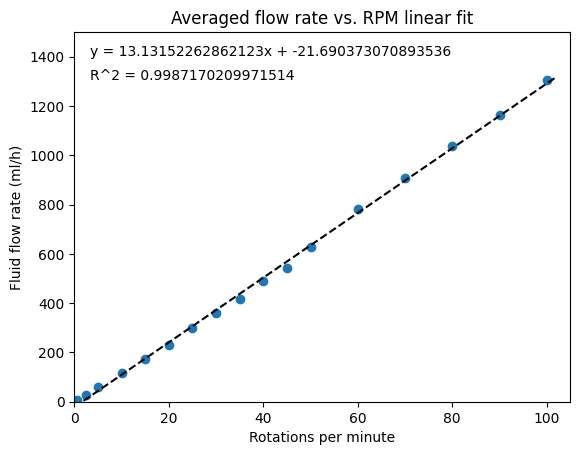

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0_1 = np.array([0.9577, 0.9436, 0.9544, 0.9427, 0.9666, 1.7248, 1.7146, 1.7387, 1.7204])

w_1 = np.array([1.0081, 1.1703, 1.4542, 1.9193, 2.4003, 3.6317, 4.2035, 4.7360, 5.1786])
dw1 = np.subtract(w_1,w0_1) # (ml/30s)

w0_2 = np.array([1.7373, 1.6971, 1.7195, 1.7263, 3.4467, 3.4417, 3.4978, 3.5816])
w_2 = np.array([3.7758, 3.9605, 4.3280, 4.9858, 7.2216, 7.7608, 8.3383, 9.0181])
dw2 = np.subtract(w_2,w0_2)*2 # (ml/15s)*2

dw = np.append(dw1, dw2)
vpm = dw * 2 # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([0.5, 2.5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, 'o')

slope, intercept = np.polyfit(rpm, vph, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Averaged flow rate vs. RPM linear fit')
plt.xlim(0, 105)
plt.ylim(0,1500)

In [ ]:
# target 0.7mL
w250 = 1.6274-0.9459
print(f'Got {w250}, error rate {(w250-0.7)/0.7* 100:.2f}%')
# target 1.0535ml
w500 = 1.9878-0.9557
print(f'Got {w500}, error rate {(w500-1.0535)/1.0535* 100:.2f}%')

w30 = (1.0712-0.9603)/2+0.9603
print(f'convert 60s to 30s total weight: {w30}')

Got 0.6815, error rate -2.64%
Got 1.0321, error rate -2.03%
convert 60s to 30s total weight: 1.01575


flow rate in (ml/h) is: [   6.654   29.808   56.436  113.052  171.54   226.068  285.108  341.28
  403.2    464.076  521.052  582.168  709.092  814.128  908.352 1118.79
 1288.638]


(0.0, 1500.0)

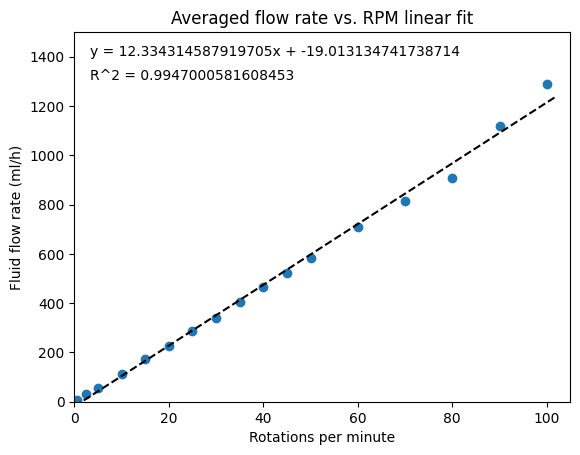

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0_1 = np.array([0.9603, 0.9616, 0.9606, 0.9570, 0.9665, 0.9344, 1.7188, 1.6755,
                 1.6922, 1.6969, 1.6886, 3.4988, 3.5747, 3.2881, 3.3962])

w_1 = np.array([1.01575, 1.2100, 1.4309, 1.8991, 2.3960, 2.8183, 4.0947, 4.5195,
                5.0522, 5.5642, 6.0307, 8.3502, 9.4838, 10.0725, 10.9658])
dw1 = np.subtract(w_1,w0_1) # (ml/30s)

w0_2 = np.array([3.5313, 3.5221])
w_2 = np.array([9.7468, 10.6812])
dw2 = np.subtract(w_2,w0_2)*1.5 # (ml/20s)*1.5

dw = np.append(dw1, dw2)
vpm = dw * 2 # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([0.5, 2.5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, 'o')

slope, intercept = np.polyfit(rpm, vph, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Averaged flow rate vs. RPM linear fit')
plt.xlim(0, 105)
plt.ylim(0,1500)

flow rate in (ml/h) is: [   6.048   27.204   59.976  117.192  172.044  228.828  298.668  359.676
  414.984  489.24   543.216  626.04   782.28   905.976 1036.584 1161.72
 1304.76 ]
flow rate 2 in (ml/h) is: [   6.654   29.808   56.436  113.052  171.54   226.068  285.108  341.28
  403.2    464.076  521.052  582.168  709.092  814.128  908.352 1118.79
 1288.638]


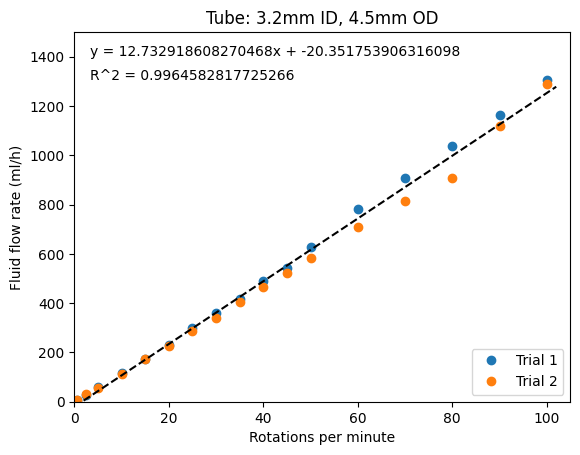

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0_1 = np.array([0.9577, 0.9436, 0.9544, 0.9427, 0.9666, 1.7248, 1.7146, 1.7387, 1.7204])
w_1 = np.array([1.0081, 1.1703, 1.4542, 1.9193, 2.4003, 3.6317, 4.2035, 4.7360, 5.1786])
dw_1 = np.subtract(w_1,w0_1) # (ml/30s)

w0_2 = np.array([1.7373, 1.6971, 1.7195, 1.7263, 3.4467, 3.4417, 3.4978, 3.5816])
w_2 = np.array([3.7758, 3.9605, 4.3280, 4.9858, 7.2216, 7.7608, 8.3383, 9.0181])
dw_2 = np.subtract(w_2,w0_2)*2 # (ml/15s)*2

dw = np.append(dw_1, dw_2)
vpm = dw * 2 # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([0.5, 2.5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, 'o', label="Trial 1")

w0_3 = np.array([0.9603, 0.9616, 0.9606, 0.9570, 0.9665, 0.9344, 1.7188, 1.6755,
                 1.6922, 1.6969, 1.6886, 3.4988, 3.5747, 3.2881, 3.3962])
w_3 = np.array([1.01575, 1.2100, 1.4309, 1.8991, 2.3960, 2.8183, 4.0947, 4.5195,
                5.0522, 5.5642, 6.0307, 8.3502, 9.4838, 10.0725, 10.9658])
dw_3 = np.subtract(w_3,w0_3) # (ml/30s)

w0_4 = np.array([3.5313, 3.5221])
w_4 = np.array([9.7468, 10.6812])
dw_4 = np.subtract(w_4,w0_4)*1.5 # (ml/20s)*1.5

dw1 = np.append(dw_3, dw_4)
vpm1 = dw1 * 2 # (ml/min)
vph1 = vpm1 * 60 # (ml/hour)
print(f'flow rate 2 in (ml/h) is: {vph1}')
plt.plot(rpm, vph1, 'o', label="Trial 2")

vpha = (vph + vph1) /2
slope, intercept = np.polyfit(rpm, vpha, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Tube: 3.2mm ID, 4.5mm OD')
plt.xlim(0, 105)
plt.ylim(0,1500)
plt.legend(loc='lower right')

## IV Tubing 1 min

flow rate in (ml/h) is: [  95.328  188.202  274.956  347.244  441.126  521.172  592.536  661.284
  725.502  815.124  962.952 1116.138 1260.762 1395.222 1520.706]


(0.0, 1500.0)

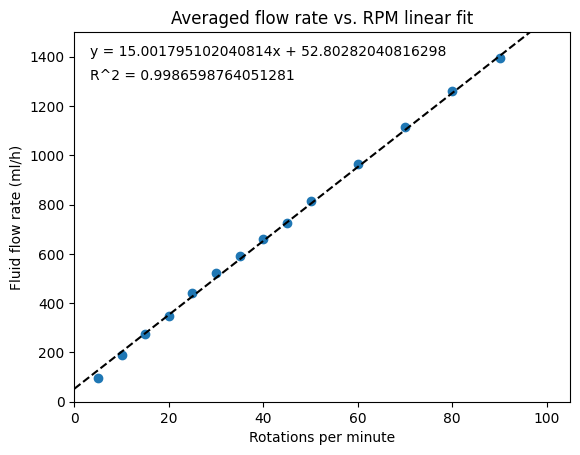

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0 = np.array([0.9271, 1.7857, 1.7823, 4.6240, 4.5786, 4.6077, 4.5930, 4.5765,
                 6.5639, 6.7992, 13.1307, 13.1620, 13.2104, 12.9395, 13.1034])

w = np.array([2.5159, 4.9224, 6.3649, 10.4114, 11.9307, 13.2939, 14.4686, 15.5979,
                18.6556, 20.3846, 29.1799, 31.7643, 34.2231, 36.1932, 38.4485])
dw = np.subtract(w,w0) # (ml/60s)

vpm = dw # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, 'o')

slope, intercept = np.polyfit(rpm, vph, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Averaged flow rate vs. RPM linear fit')
plt.xlim(0, 105)
plt.ylim(0,1500)

flow rate in (ml/h) is: [  90.324  175.98   265.134  338.736  423.984  507.174  581.934  648.63
  726.246  795.762  950.01  1087.116 1224.282 1361.586 1527.918]


(0.0, 1500.0)

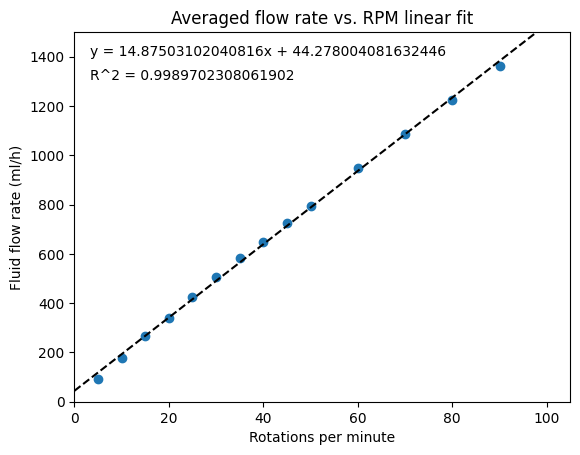

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0 = np.array([0.9517, 1.7678, 1.7628, 4.7724, 4.7741, 4.6938, 4.5654, 4.6172,
               6.7270, 6.6892, 13.1307, 13.1620, 13.2104, 12.9395, 13.1034])

w = np.array([2.4571, 4.7008, 6.1817, 10.4180, 11.8405, 13.1467, 14.2643, 15.4277,
              18.8311, 19.9519, 28.9642, 31.2806, 33.6151, 35.6326, 38.5687])
dw = np.subtract(w,w0) # (ml/60s)

vpm = dw # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, 'o')

slope, intercept = np.polyfit(rpm, vph, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Averaged flow rate vs. RPM linear fit')
plt.xlim(0, 105)
plt.ylim(0,1500)


flow rate in (ml/h) is: [  95.328  188.202  274.956  347.244  441.126  521.172  592.536  661.284
  725.502  815.124  962.952 1116.138 1260.762 1395.222 1520.706]
flow rate 2 in (ml/h) is: [  90.324  175.98   265.134  338.736  423.984  507.174  581.934  648.63
  726.246  795.762  950.01  1087.116 1224.282 1361.586 1527.918]


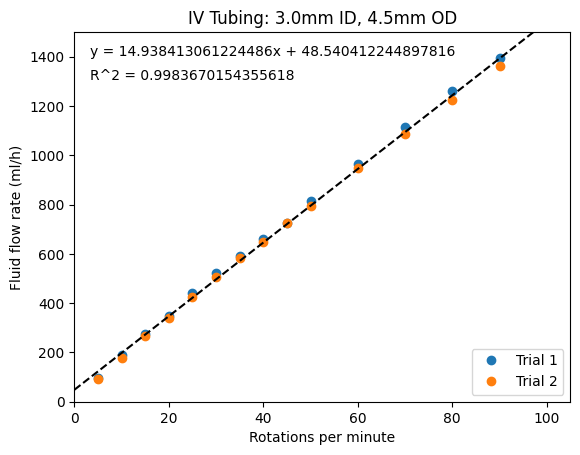

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0 = np.array([0.9271, 1.7857, 1.7823, 4.6240, 4.5786, 4.6077, 4.5930, 4.5765,
                 6.5639, 6.7992, 13.1307, 13.1620, 13.2104, 12.9395, 13.1034])
w = np.array([2.5159, 4.9224, 6.3649, 10.4114, 11.9307, 13.2939, 14.4686, 15.5979,
                18.6556, 20.3846, 29.1799, 31.7643, 34.2231, 36.1932, 38.4485])
dw = np.subtract(w,w0) # (ml/60s)

vpm = dw # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, 'o', label="Trial 1")

w0_1 = np.array([0.9517, 1.7678, 1.7628, 4.7724, 4.7741, 4.6938, 4.5654, 4.6172,
               6.7270, 6.6892, 13.1307, 13.1620, 13.2104, 12.9395, 13.1034])
w_1 = np.array([2.4571, 4.7008, 6.1817, 10.4180, 11.8405, 13.1467, 14.2643, 15.4277,
              18.8311, 19.9519, 28.9642, 31.2806, 33.6151, 35.6326, 38.5687])
dw1 = np.subtract(w_1,w0_1) # (ml/60s)

vpm1 = dw1 # (ml/min)
vph1 = vpm1 * 60 # (ml/hour)
print(f'flow rate 2 in (ml/h) is: {vph1}')
plt.plot(rpm, vph1, 'o', label="Trial 2")

vpha = (vph + vph1) /2
slope, intercept = np.polyfit(rpm, vpha, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('IV Tubing: 3.0mm ID, 4.5mm OD')
plt.xlim(0, 105)
plt.ylim(0,1500)
plt.legend(loc='lower right')